In [3]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns


from collections import OrderedDict
from hmm_learning import train_device_models, evaluate_models, read_test_files, summarize_params_selection
from hmmlearn import hmm
from visualisations import classification_heatmap, highlight_max

In [4]:
devices_dataset = pd.read_csv("house_devices.csv")

In [3]:
devices_dataset.head()

,time,lighting2,lighting5,lighting4,refrigerator,microwave
0,1302930703,180,23,195,117,2
1,1302930721,181,23,195,119,2
2,1302930738,180,23,195,117,2
3,1302930765,181,23,195,117,2
4,1302930782,180,23,195,118,2


In [4]:
devices_dataset.shape

(14999, 6)

In [5]:
devices_dataset.describe()

,time,lighting2,lighting5,lighting4,refrigerator,microwave
count,1.499900e+04,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,1.303161e+09,46.444630,17.852990,45.995933,46.283086,6.710247
std,1.315710e+05,91.600463,45.832236,70.079602,66.730693,88.110723
min,1.302931e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.303068e+09,0.000000,1.000000,0.000000,0.000000,2.000000
50%,1.303144e+09,0.000000,1.000000,0.000000,1.000000,2.000000
75%,1.303299e+09,22.000000,21.000000,63.000000,115.000000,2.000000
max,1.303371e+09,362.000000,211.000000,203.000000,916.000000,1798.000000


In [6]:
devices_dataset.nunique()

time            14999
lighting2          58
lighting5          61
lighting4          96
refrigerator      109
microwave          50
dtype: int64

## Learning process

In [5]:
result_df, collected_models = train_device_models(devices_dataset)

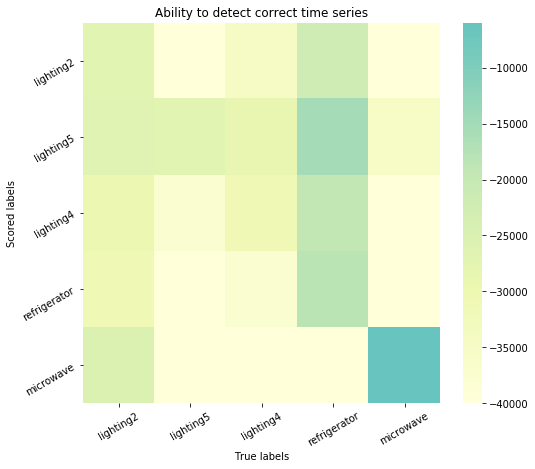

In [6]:
classification_heatmap(result_df)

In [7]:
summarize_params_selection(collected_models)

,Hidden States
Device,
lighting2,2
lighting5,2
lighting4,2
refrigerator,2
microwave,2


## Evaluation on training sets

In [8]:
test_dfs = read_test_files()
true_labels = ["ligthing2", "ligthing2", "refrigerator", "microwave", "lighting5", "lighting4"]
evaluation_results = evaluate_models(test_dfs, collected_models, true_labels)

In [9]:
evaluation_results.style.apply(highlight_max, axis=1)

,lighting2,lighting4,lighting5,microwave,refrigerator,True labels
0,-14832.5,-15795.5,-14723,-126160,-11425.8,ligthing2
1,-28059.7,-40339.2,-74636.6,-46332.5,-28955,ligthing2
2,-36481.1,-43283.8,-103954,-52422,-21742,refrigerator
3,-34214.9,-87760.1,-265529,-8528.16,-60098.9,microwave
4,-16888.9,-19302.2,-17756,-23070.4,-8448.43,lighting5
5,-16162.3,-17523.5,-22265.4,-28348.1,-8825.82,lighting4
